# Reads the root data collected with SiPM's

In [1]:
from datetime import datetime
print('Executed at', datetime.now().time(), 'on', datetime.now().date() )

Executed at 19:19:03.081357 on 2023-12-13


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# from numba import jit
# from ROOT import *

# from ctypes import c_double

from CAENReader import DataFile 

In [3]:
from time import perf_counter

In [4]:
%matplotlib widget

## Reading the txt files

In [5]:
# ch0_txtdata_loc = '/home/sarthak/my_projects/ArgSet/data/Run_6/run0_wave_b0_ch0.txt'
# ch1_txtdata_loc = '/home/sarthak/my_projects/ArgSet/data/Run_6/run0_wave_b0_ch1.txt'
# ch2_txtdata_loc = '/home/sarthak/my_projects/ArgSet/data/Run_6/run0_wave_b0_ch2.txt'

# ch0_txtdata = pd.read_csv(ch0_txtdata_loc, sep='\t', skiprows=1, header=None)
# ch1_txtdata = pd.read_csv(ch1_txtdata_loc, sep='\t', skiprows=1, header=None)
# ch2_txtdata = pd.read_csv(ch2_txtdata_loc, sep='\t', skiprows=1, header=None)

# plt.close(1)
# plt.figure(1, figsize=(8,6))
# plt.plot(ch0_txtdata[:][1], label='Channel 0')
# plt.plot(ch1_txtdata[:][1], label='Channel 1')
# plt.plot(ch2_txtdata[:][1], label='Channel 2')
# plt.yscale('log')
# plt.legend()
# plt.title('Run 6')

<hr>

## Reading the root file generated by CAENwaveanalysis2root_update.py

In [6]:
# output_root_file_name = '/home/sarthak/my_projects/ArgSet/CAENAnalyzer/rawdata/output_0.root'

In [7]:
# aggregate_file_name = '/home/sarthak/my_projects/ArgSet/CAENAnalyzer/rawdata/aggregate_waveforms.root'

In [8]:
# in_file = TFile.Open(output_root_file_name)

In [9]:
# in_file.ls()

In [10]:
# tree_T = in_file.Get('T')

In [11]:
# list_datapoints = []
# cntr = 0
# for i in range(tree_T.GetEntries()):
#     list_datapoints.append(tree_T.GetEntry(i))

In [12]:
# tree_T.b0tr0[4069]

In [13]:
# plt.figure()
# plt.plot(list_datapoints)
# plt.yscale('log')
# # plt.ylim(10**(4), 10**(6))

<hr>

In [14]:
### Delete
### copied from \\wsl.localhost\Ubuntu-22.04\home\sarthak\my_projects\cern_campaign\read_PMTDAQ_files.ipynb
# import array
# # in_file_obj=TFile.Open(path.join("/home/sarthak/Downloads", "output_run4.root"), "READ")

# # data_tree = in_file_obj.tree

# wave = array.array('i', 500*[0])

# # count_array = array.array('i', [])

# # data_tree.SetBranchAddress('s1', wave)
# tree_T.SetBranchAddress('~branch-name~', wave)

# # # data_tree.GetEntries()

# # # data_tree.GetBranch()

<hr>

## reading the binary data file using CAENReader module

<p style='font-size:large;font-weight:bold;'> the method here is inspired by the code written by Andre for converting binary file to root format. </p>

In [15]:
# binary_segment_name = 'data/Run_6/run0_raw_b0_seg0.bin'

# open_file = DataFile(binary_segment_name)

In [16]:
# trigger_r = open_file.getNextTrigger()

In [17]:
## open_file.close()

In [18]:
## trigger_r.boardId

## trigger_r.channelUse

## trigger_r.numChannels

## trigger_r.eventSize

In [19]:
t0 =2

In [20]:
# trace_tr0 = trigger_r.traces['b0tr0']
# trace_tr1 = trigger_r.traces['b0tr1']
# trace_tr2 = trigger_r.traces['b0tr2']

In [21]:
integration_values_array_tr1 = np.array([])
t0 = 2
cntr = 0 # diag
not_4070_cntr = 0 # diag
files_index_begin = 0
files_index_end = 4

for i in range( files_index_begin, files_index_end+1):
    binary_segment_name = f'data/Run_6/run0_raw_b0_seg{i}.bin'
    open_file = DataFile(binary_segment_name)
    while True:
        trigger_r = open_file.getNextTrigger()
        if trigger_r is None:
            break
        cntr += 1 # diag
        trace_tr0 = trigger_r.traces['b0tr0']
        trace_tr1 = trigger_r.traces['b0tr1']
        trace_tr2 = trigger_r.traces['b0tr2']
        # open_file.close()
        if len(trace_tr1) == 4070:
            # baseline_subtracted_tr1 = trace_tr1[t0:] - np.mean(trace_tr1[t0:500])
            baseline_subtracted_tr1 = trace_tr1 - np.mean(trace_tr1[t0:500])
            pulse_win_integration_tr1 = np.sum(baseline_subtracted_tr1[500:700])
            integration_values_array_tr1 = np.append(integration_values_array_tr1, pulse_win_integration_tr1)
        else : # diag
            not_4070_cntr += 1 #diag

In [22]:
### for diagnostic purpose only

integration_values_array_tr1 = np.array([])
t0 = 2
cntr = 0 # diag
not_4070_cntr = 0 # diag
less_than_4070_list = []
files_index_begin = 0
files_index_end = 4

for i in range(files_index_begin, files_index_end+1):
    binary_segment_name = f'data/Run_6/run0_raw_b0_seg{i}.bin'
    open_file = DataFile(binary_segment_name)
    while True:
        trigger_r = open_file.getNextTrigger()
        if trigger_r is None:
            break
        cntr += 1 # diag
        trace_tr0 = trigger_r.traces['b0tr0']
        trace_tr1 = trigger_r.traces['b0tr1']
        trace_tr2 = trigger_r.traces['b0tr2']
        # open_file.close()
        if len(trace_tr1) >= 4070:
            # baseline_subtracted_tr1 = trace_tr1[t0:] - np.mean(trace_tr1[t0:500])
            baseline_subtracted_tr1 = trace_tr1 - np.mean(trace_tr1[t0:500])
            pulse_win_integration_tr1 = np.sum(baseline_subtracted_tr1[500:700])
            integration_values_array_tr1 = np.append(integration_values_array_tr1, pulse_win_integration_tr1)
        else : # diag
            # not_4070_cntr += 1 #diag
            less_than_4070_list.append(len(trace_tr1))

In [46]:
max(less_than_4070_list)

2714

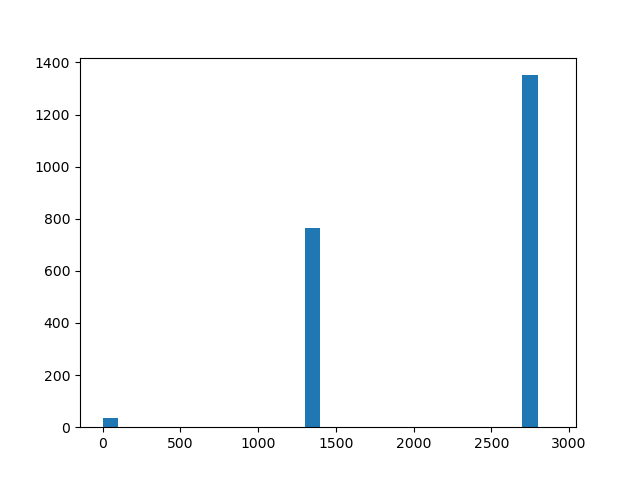

In [50]:
plt.figure()
# plt.hist(less_than_4070_list);
plt.hist(less_than_4070_list, bins=np.arange(0, 3000, 100));

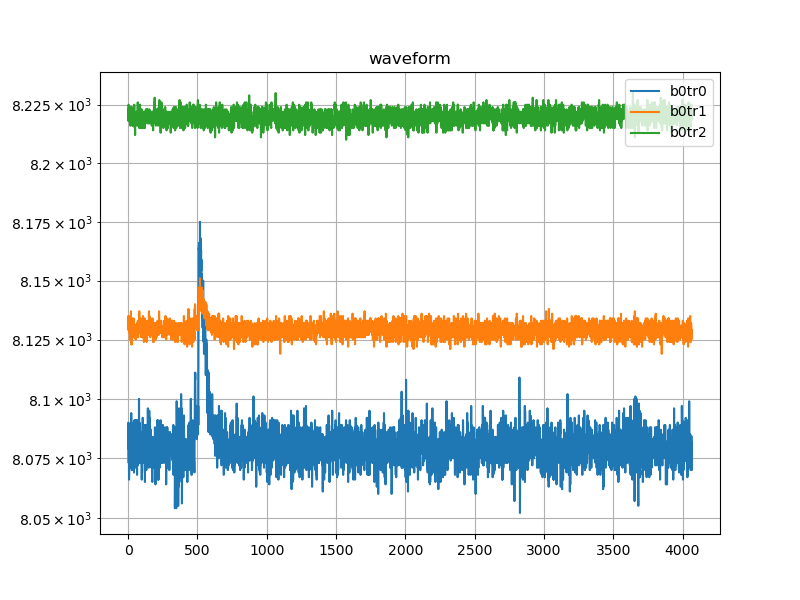

In [24]:
plt.close(2)
plt.figure(2, figsize=(8,6))
plt.title('waveform')
plt.plot(trace_tr0[t0:], label='b0tr0')
plt.plot(trace_tr1[t0:], label='b0tr1')
plt.plot(trace_tr2[t0:], label='b0tr2')
plt.yscale('log')
plt.grid(which='both')
plt.legend(loc='upper right')

In [25]:
## compares the plots from binary file with those from txt file.
# plt.close('multi plot')
# plt.figure('multi plot', figsize=(10,5))
# plt.subplot(1, 2, 1)
# plt.plot(ch0_txtdata[:][1], label='Channel 0')
# plt.plot(ch1_txtdata[:][1], label='Channel 1')
# plt.plot(ch2_txtdata[:][1], label='Channel 2')
# plt.yscale('log')
# plt.grid(which='both')
# plt.legend(loc='upper right')
# plt.subplot(1, 2, 2)
# plt.plot(trace_tr0[t0:], label='b0tr0')
# plt.plot(trace_tr1[t0:], label='b0tr1')
# plt.plot(trace_tr2[t0:], label='b0tr2')
# plt.yscale('log')
# plt.grid(which='both')
# plt.legend(loc='upper right')
# plt.title('Subplots Run 6 last trace')

In [26]:
plt.figure(2)
plt.plot(trace_tr1[t0:500], label='pretrigger windows')
# plt.plot(trigger_r.traces['b0tr0'] - np.mean(trigger_r.traces['b0tr0'][t0:500]),  label = 'baseline substracted b0tr0')
plt.yscale('log')
plt.grid(which='both')
plt.legend(loc='upper right')

In [27]:
plt.figure(2)
plt.axvline(500-t0, color='cyan')
plt.axvline(700, color='black')
plt.grid(axis='both')

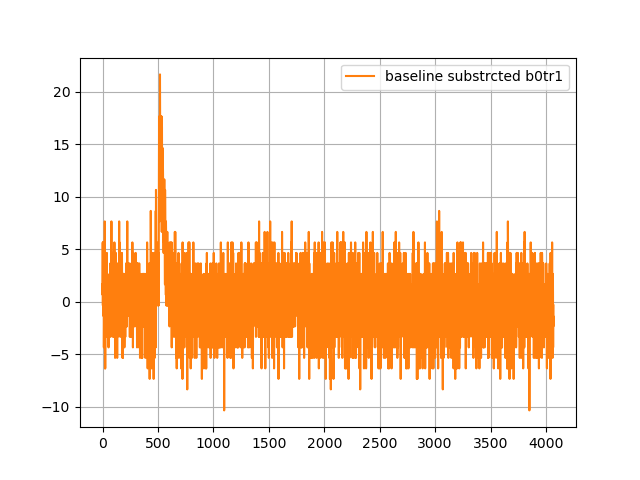

In [28]:
# baseline_subtracted_tr1 = trace_tr1[t0:] - np.mean(trace_tr1[t0:500])
baseline_subtracted_tr1 = trace_tr1 - np.mean(trace_tr1[t0:500])

plt.close(3)
plt.figure(3)
plt.plot(baseline_subtracted_tr1[t0:],  color = 'C1', label = 'baseline substrcted b0tr1')
# plt.yscale('log')
plt.grid(which='both')
plt.legend(loc='upper right')

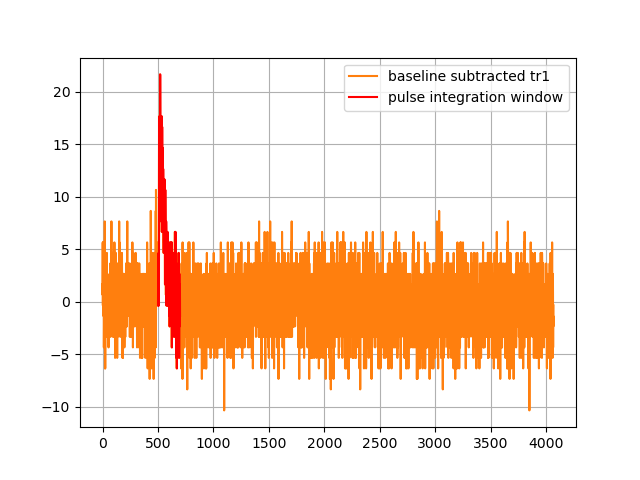

In [29]:
plt.close(4)
plt.figure(4)
plt.plot(baseline_subtracted_tr1[t0:], color='C1', label='baseline subtracted tr1')
plt.plot(np.arange(500, 700), baseline_subtracted_tr1[500:700], color='red', label='pulse integration window')
# plt.yscale('log')
plt.grid(which='both')
plt.legend(loc='upper right')

In [30]:
cntr

105128

In [31]:
integration_values_array_tr1

array([ 292.26104418,  805.20883534, 2102.18875502, ...,  415.08032129,
        439.20481928,  831.10441767])

In [32]:
len(integration_values_array_tr1)

102977

In [33]:
not_4070_cntr

0

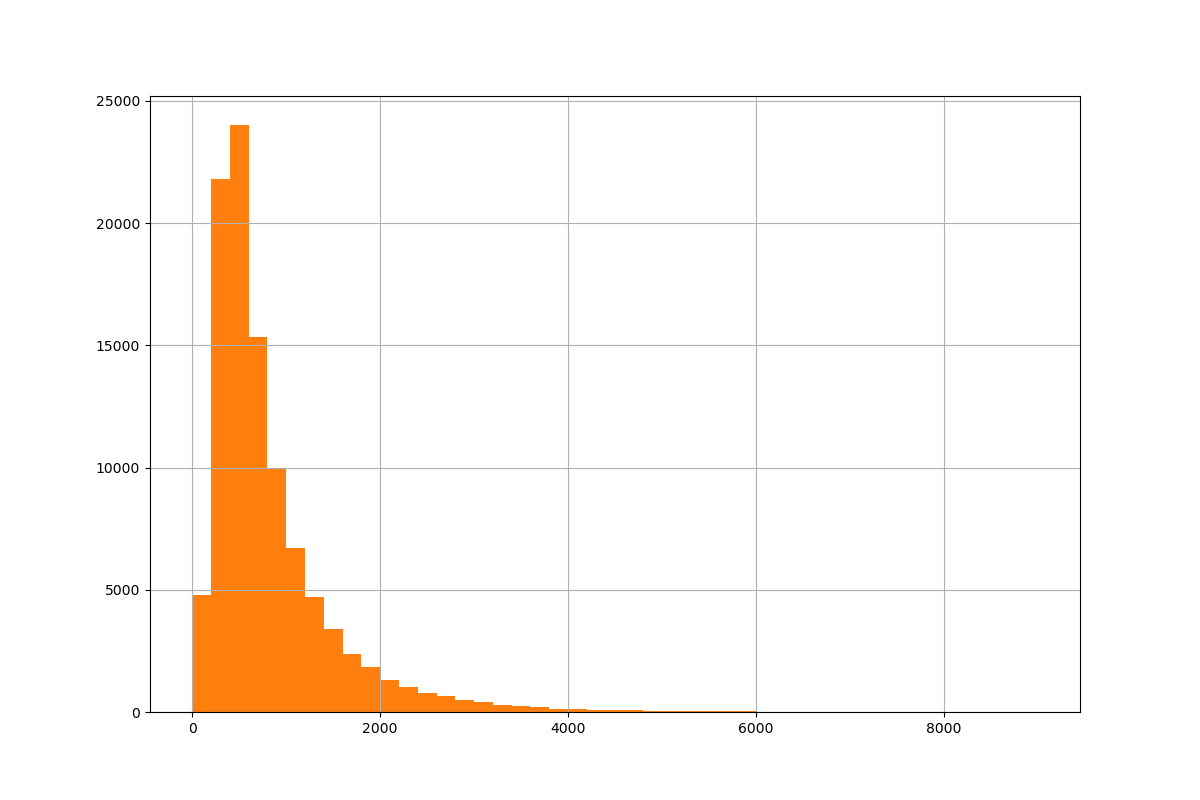

In [34]:
plt.close(5)
plt.figure(5, figsize=(12,8))
plt.hist(integration_values_array_tr1, bins=np.arange(0, 9001, 200), color='C1');
# plt.yscale('log')
# plt.xscale('log')
plt.grid()

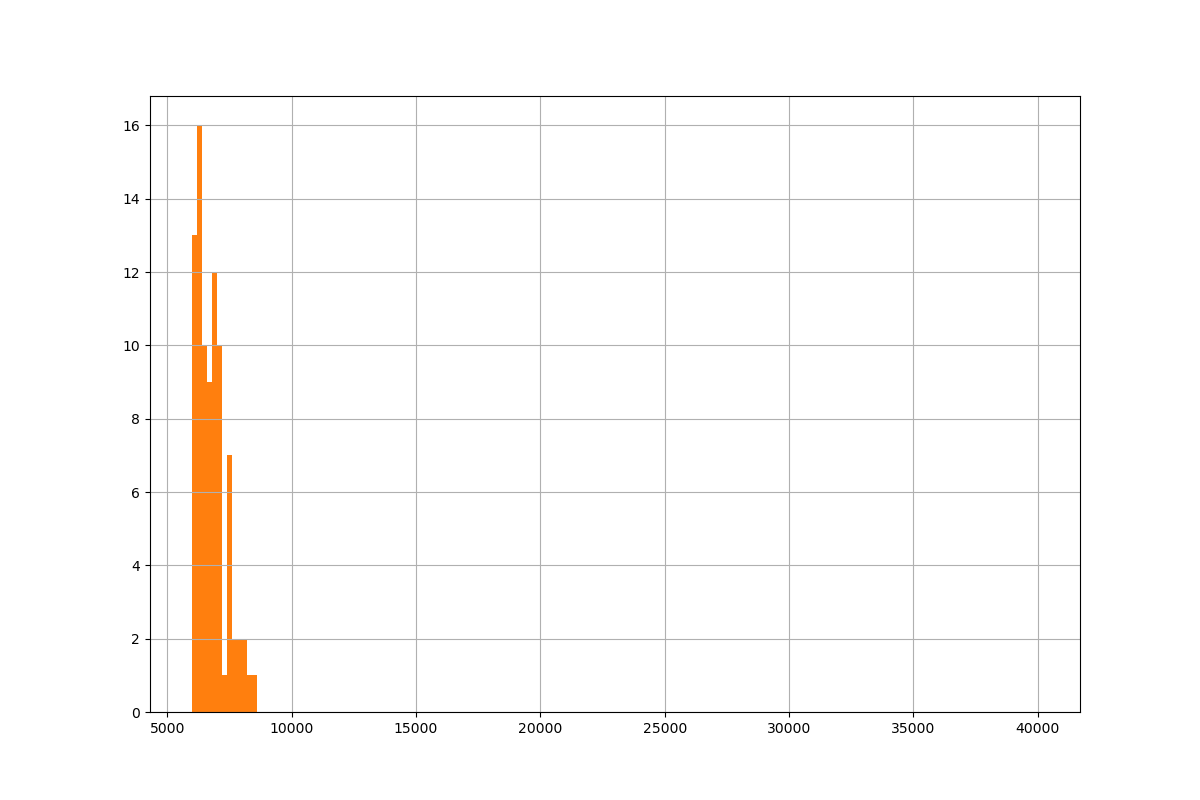

In [35]:
plt.close(6)
plt.figure(6, figsize=(12,8))
# plt.hist(integration_values_array);
plt.hist(integration_values_array_tr1, bins=np.arange(6000, 40001, 200), color='C1');
plt.grid()

In [36]:
trace_tr0

array([ 2035, 40846,  8079, ...,  8078,  8070,  8084], dtype=uint16)

In [37]:
len(trace_tr0)

4070

In [38]:
# trigger_r.traces['b0tr0']

<hr>

## Write the code as a function

<p style=''> ToDo: see if we can make jit work on this function </p>

In [88]:
# @jit(nopython=True)
def process_over_entire_run(run_folder_name:str, channels_list:list, segment_index_begin:int=0, segment_index_end:int=4) -> dict:
    '''
    Do baseline subtraction and integrate over the pulse window. 
    Return a dictionary of the format {'tr0': ndarray of integration values for channel 0}
    '''
    
    t0 = 2 # how many bins to skip

    pretrigger_begin = t0
    pretrigger_end = 500

    pulse_integration_window_begin = 500
    pulse_integration_window_end = 700
    
    integration_values_array_tr0 = np.array([])
    integration_values_array_tr1 = np.array([])
    integration_values_array_tr2 = np.array([])
    
    cntr = 0 # diag
    not_4070_cntr = 0 # diag
    
    # segment_index_begin = 0 # index of first binary segment in the run folder
    # segment_index_end = 4 # index of the last binary segment

    integration_vector_dict = { 
                                'tr0': np.array([]),
                                'tr1': np.array([]),
                                'tr2': np.array([]),
                                }
    
    for i in range(segment_index_begin, segment_index_end+1):
        binary_segment_name = f"data/{run_folder_name}/run0_raw_b0_seg{i}.bin"
        open_file = DataFile(binary_segment_name)
        while True:
            trigger_r = open_file.getNextTrigger()
            if trigger_r is None:
                break
            cntr += 1 # diag
            trace_tr0 = trigger_r.traces['b0tr0'] ## do we need to create 3 variables?
            trace_tr1 = trigger_r.traces['b0tr1']
            trace_tr2 = trigger_r.traces['b0tr2']
            # open_file.close()
            for ch in channels_list:
                trace_ch = [trace_tr0, trace_tr1, trace_tr2][ch]
                # if len(trace_ch) == 4070:                                            ## accepting waveforms with length 4070
                if len(trace_ch) > 2:                                                  ## accepting waveforms with length as small as 3
                    
                    baseline_subtracted_ch = trace_ch - np.mean(trace_ch[pretrigger_begin : pretrigger_end])
                    pulse_win_integration_ch = np.sum(baseline_subtracted_ch[pulse_integration_window_begin:pulse_integration_window_end])      ## sum or integrate?
                    integration_vector_dict[f"tr{ch}"] = np.append(integration_vector_dict[f"tr{ch}"], pulse_win_integration_ch)
                else: # diag
                    not_4070_cntr += 1 # diag
                                
    return integration_vector_dict

In [80]:
start_time = perf_counter()
integration_vector_dict_6_ch1 = process_over_entire_run('Run_6', [1], 0, 4)
print('executiuon time:', perf_counter() - start_time)

executiuon time: 9.737657262001449


In [81]:
integration_vector_dict_6_ch1

{'tr0': array([], dtype=float64),
 'tr1': array([ 271.63052209,  679.10441767, 1322.59437751, ...,  396.04016064,
         371.60240964,  755.05220884]),
 'tr2': array([], dtype=float64)}

In [89]:
start_time = perf_counter()

integration_vector_dict_12_ch2 = process_over_entire_run('Run_12', [2], 0, 4)
print('executiuon time:', perf_counter() - start_time)

executiuon time: 10.371217493000586


In [83]:
t0 = 2

Text(0.5, 1.0, 'run 6')

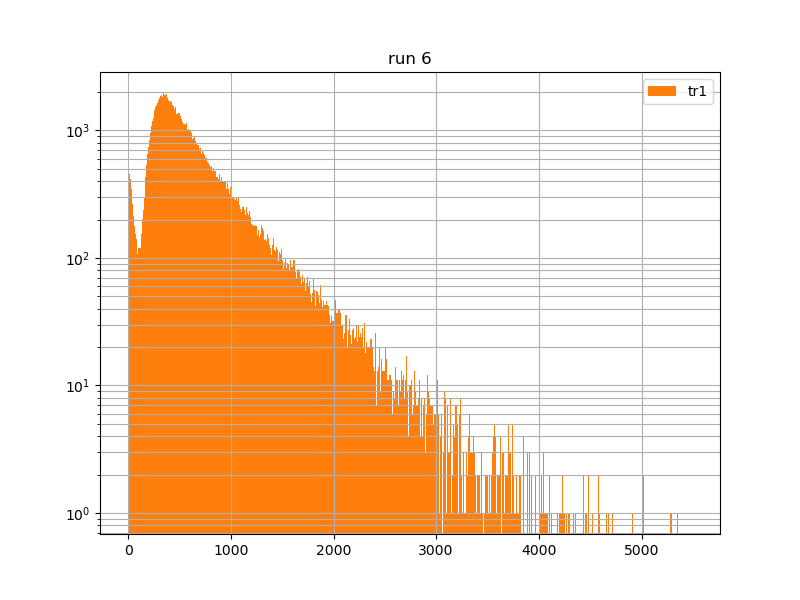

In [86]:
plt.close(7)
plt.figure(7, figsize=(8,6))
plt.hist(integration_vector_dict_6_ch1['tr1'][t0:], bins=np.arange(0, 5500, 10), color='C1', label='tr1')
# plt.plot(np.arange(500, 700), integration_vector_dict_l['tr1'][500:700], color='red', label='pulse integration window')
plt.yscale('log')
plt.grid(which='both')
plt.legend(loc='upper right')
plt.title('run 6')

Text(0.5, 1.0, 'Run 12')

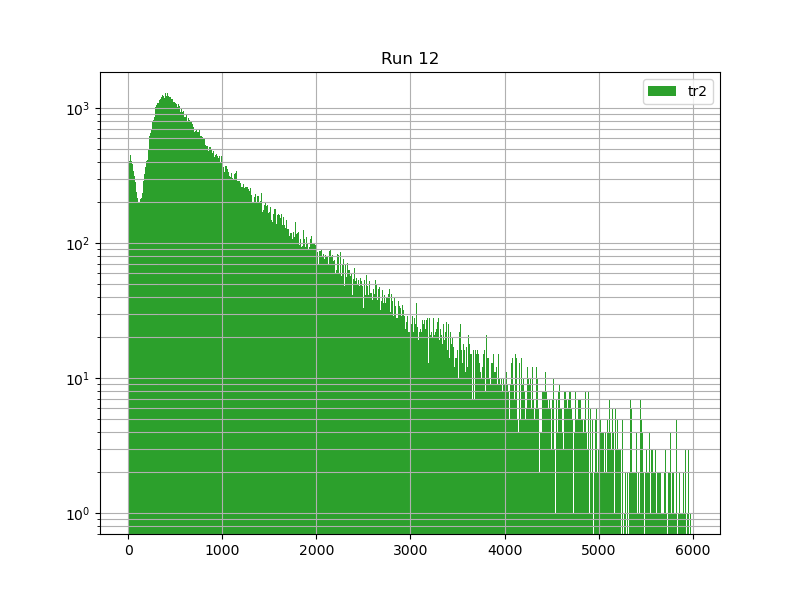

In [90]:
plt.close(8)
plt.figure(8, figsize=(8,6))
plt.hist(integration_vector_dict_12_ch2['tr2'][t0:], bins=np.arange(0, 6000, 10), color='C2', label='tr2')
plt.yscale('log')
plt.grid(which='both')
plt.legend(loc='upper right')
plt.title('Run 12')

<hr>